/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


            Adj Close
Date                 
2016-01-04  36.566746
2016-01-05  36.696102
2016-01-06  36.497734
2016-01-07  35.894047
2016-01-08  35.799183
...               ...
2019-12-24  53.746082
2019-12-26  54.050625
2019-12-27  54.374809
2019-12-30  54.296219
2019-12-31  54.374809

[1006 rows x 1 columns]
            Adj Close  Prediction
Date                             
2019-12-24  53.746082         NaN
2019-12-26  54.050625         NaN
2019-12-27  54.374809         NaN
2019-12-30  54.296219         NaN
2019-12-31  54.374809         NaN
[37.50678635 37.61026764 37.74825287 37.89487076 37.67926025 37.86898804
 38.08459854 37.20493317 37.19630432 37.67926025 37.74825287 37.912117
 38.0414772  37.95523834 38.22258759 38.64517593 39.00738907 39.28552246
 39.36374664 39.32028961 39.15514374 39.78093719 39.63318253 39.69402313
 39.54626465 39.51150131 39.61580276 39.80701447 40.39802933 40.4849472
 40.31980515 40.70223618 40.7543869  40.44149017 40.59793472 40.2937355
 40.7369957  40.3

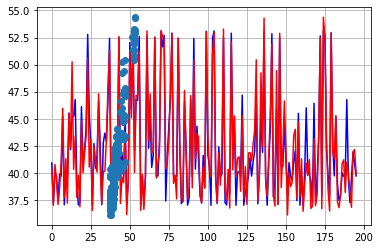

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as dr
from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

data = dr.data.get_data_yahoo("KO", start = '2016-01-01', end = '2020-01-01')

data = data[['Adj Close']]


print(data)

forecast_out = 30
data['Prediction'] = data[['Adj Close']].shift(-forecast_out)
print(data.tail())

X = np.array(data.drop(['Prediction'],1)) # creating new data set X after dropping 'Prediction column'.

X = X[:-forecast_out] # removed last 30 rows of data

y = np.array(data['Prediction']) # create dependent data set y which will hold future prediction

y = y[:-forecast_out]
print(y)

#y.shape, X.shape # We are predicting prices not returns
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


x_train.shape, y_train.shape

svr_rbf = SVR(kernel='rbf', C=1000, gamma=0.1) 
svr_rbf.fit(x_train, y_train)


svm_confidence = svr_rbf.score(x_test, y_test)
print('svm_confidence:', svm_confidence)
svr_rbf.predict(x_test) # predicted prices

plt.plot(svr_rbf.predict(x_test), color = 'blue') 
plt.plot(y_test, color = 'red') # y_test(actual data), the plot shows some overlap

plt.grid()
plt.plot(svr_rbf.predict(x_test), y_test, 'o') # very high correlation. 

